<a href="https://colab.research.google.com/github/AnhHuynh1999/DPT/blob/main/BaiTap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
x = np.uint8([250])
y = np.uint8([10])
print (cv2.add(x,y)) 
print (x+y) 

[[255]]
[4]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


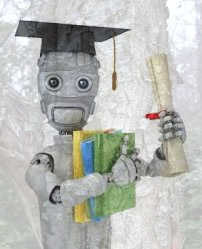

In [21]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')
img1 = cv2.imread('/content/drive/MyDrive/Hinh/images (1).jpg')
img2 = cv2.imread('/content/drive/MyDrive/Hinh/download (1).jpg')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)
cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

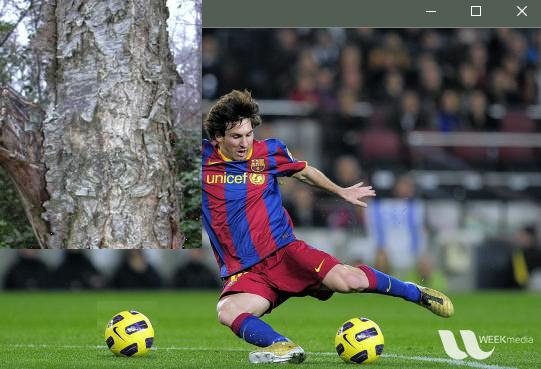

In [38]:


img1 = cv2.imread('/content/drive/MyDrive/Hinh/55498408b10042796432d9d486545f42.png')
img2 = cv2.imread('/content/drive/MyDrive/Hinh/download (1) (1).jpg')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2_imshow(img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [30]:
img1 = cv2.imread('/content/drive/MyDrive/Hinh/55498408b10042796432d9d486545f42.png')
e1 = cv2.getTickCount()
for i in range(5,49,2):
  img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
print (t)


0.472272363


In [36]:

In [5]: cv2.useOptimized()
Out[5]: True
In [6]: %timeit res = cv2.medianBlur(img,49)
# Disable it
In [7]: cv2.setUseOptimized(False)
In [8]: cv2.useOptimized()
Out[8]: False
In [9]: %timeit res = cv2.medianBlur(img,49)


10 loops, best of 3: 22.3 ms per loop
10 loops, best of 3: 22.3 ms per loop
